<a href="https://colab.research.google.com/github/Jii111/ESAA-2/blob/main/2%EC%A3%BC%EC%B0%A8%20%EA%B8%88%20%EA%B3%BC%EC%A0%9C_4%EC%9E%A5%20%EB%AA%A8%EB%8D%B8%20%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH04. 모델훈련

**선형모델** 훈련

-직접 계산할 수 있는 공식을 사용해 훈련 세트에 가장 잘맞는 모델 파라미터(훈련 세트에 대해 비용 함수를 최소화하는) 구하기

-경사하강법 이용해 반복적인 최적화 방식 사용하여 비용 함수를 훈련 세트에 대해 최소화  

**다항 회귀 모델** 훈련

-파라미터가 많아 과대적합되기 쉬움

-학습 곡선을 사용해 모델이 과대적합되는지 감시하는 방법

-과대적합 감소시킬 수 있는 규제 기법

-로지스틱 회귀/소프트맥스 회귀

**선형 회귀**

-일반적으로 선형 모델은 입력 특성의 가중치 합과 편향(절편) 상수를 더해 예측
(식 추가)
-'모델을 훈련시킨다'=모델이 훈련세트에 잘 맞도록 파라미터 설정
 -> 평균 제곱근 오차(RMSE) 또는 평균 제곱 오차(MSE)를 최소화하는 값 찾기

## 4.1.1 정규 방정식

-비용함수를 최소화하는 θ값을 찾기 위한 공식

In [1]:
import numpy as np
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [4]:
X_b=np.c_[np.ones((100,1)),X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.8832238 ],
       [3.16614803]])

In [7]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 3.8832238 ],
       [10.21551987]])

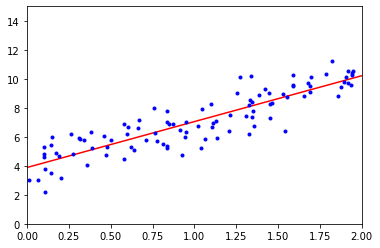

In [12]:
import matplotlib.pyplot as plt

plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_
lin_reg.predict(X_new)

array([[ 3.8832238 ],
       [10.21551987]])

In [16]:
#lstsq: leat squares
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[3.8832238 ],
       [3.16614803]])

In [17]:
np.linalg.pinv(X_b).dot(y)

array([[3.8832238 ],
       [3.16614803]])

**유사역행렬**

-특잇값 분해(SVD)라 부르는 표준 행렬 분해 기법 사용해 계산

-정규 방정식보다 훨씬 효율적

-역행렬이 없다면 정규방정식이 작동하지 않지만, 유사역행렬은 항상 구할 수 있음

## 4.1.2 계산 복잡도

-예측 계산 복잡도는 샘플 수와 특성 수에 선형적

## **4.2 경사 하강법**

-여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘

-기본 아이디어: 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것

-파라미터 벡터 θ(임의의 값으로 시작;random initialization)에 대해 비용 함수의 현재 GRDADIENT 계산 > GRADIENT가 감소하는 반향으로 진행 > GRADIENT가 0이 되면 최솟값에 도달

-학습률: 스텝의 크기, 경사 하강법에서 중요한 파라미터

-문제점: 전역 최솟값보다 지역 최솟값 선택
 ; 선형회귀를 위한 MSE함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록함수 > 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것 보장

 -경사하강법을 사용할 때에는 반드시 모든 특성이 같은 스케일을 갖도록 해야함(사이킷런의 StandardScaler)                                                          

## 4.2.1 배치 경사 하강법

-편도함수: θ가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산

-적절한 학습률을 찾으려면 그리드 탐색 사용

-그리드 탐색에서 수렴하는데 너무 오래 걸리는 모델을 막기 위해 반복횟수를 제한해야 함

-반복함수
  -너무 작으면 최적점에 도달하기 전에 알고리즘 멈춤
  -너무 크면 파라미터가 변하지 않는 동안 시간 낭비
  -반복 횟수를 아주 크게 지정하고, GRADIENT 벡터가 아주 작아지면(멕터의 노름이 허용오차보다 작아지면) 알고리즘 중지

-가장 큰 문제점: 매 스텝에서 전체 훈련 세트를 사용해 GRADIENT를 계산해야 한다는 것

In [18]:
eta=0.1
n_iterations=1000
m=100

theta=np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta=theta-eta*gradients

In [19]:
theta

array([[3.8832238 ],
       [3.16614803]])

## 4.2.2 확률적 경사 하강법

-매 스텝에서 1개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트 계산

-매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 훨씬 빠름&매우 큰 훈련 세트도 훈련 가능

-확률적이기 때문에 배치 경사 하강법보다 훨씬 불안정(위아래로 요동치면서 평균적으로 감소)

-비용함수가 불규칙할 경우, 알고리즘이 지역 최솟값을 건너뛸 수 있도록 도와주므로 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성 높

-학습률 점진적으로 감소
  -담금질 기법 알고리즘과 유사
  -학습률이 너무 빨리 줄어들면 지역 최솟값에 갇히거나 최솟값까지 가는 중간에 멈춰버릴 수 있음
  -학습률이 너무 천천히 줄어들면 오랫동안 최솟값 주변을 맴돌거나 훈련을 너무 일찍 중지해서 지역 최솟값에 머무를 수 있음


-사이킷런의 SGDClassifier: 에포크마다 알고리즘이 모든 샘플을 사용하게 하기 위해 훈련 세트를 섞은 후 차례대로 하나씩 선택하고, 다음 에포크에서 다시 섞는 식의 방법

In [22]:
import numpy as np

n_epochs=50
t0,t1=5,50
def learning_schedule(t):
  return t0/(t+t1)

theta=np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index=np.random.randint(m)
    xi=X_b[random_index:random_index+1]
    yi=y[random_index:random_index+1]
    gradients=2*xi.T.dot(xi.dot(theta)-yi)
    eta=learning_schedule(epoch*m+i)
    theta=theta-eta*gradients

In [23]:
theta

array([[3.85491602],
       [3.13056355]])

In [24]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [25]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.90300773]), array([3.15999081]))

## 4.2.3 미니배치 경사 하강법

-미니 배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트 계산

-장점: 행렬 연산에 최적화된 하드웨어, GPU를 사용해서 얻는 성능 향상

-미니배치를 어느정도 크게 하면, 파라미터 공간에서 sgd보다 덜 불규칙하게 움직임

## **4.3 다항 회귀**

-비선형 데이터를 학습하는데 선형 모델 사용 가능

-각 특성의 거듭제곱을 새로운 특성으로 추가, 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것



In [26]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([-2.22190266])

In [29]:
X_poly[0]

array([-2.22190266,  4.93685142])

In [30]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.81926855]), array([[1.00782783, 0.51448315]]))

## **4.4 학습 곡선**

-교차검증->과대적합/과소적합 확인 가능
-학습곡선: 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄
  -이 그래프를 생성하기 위해 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러번 훈련시키면 됨

**편향/분산 트레이드오프**

-편향: 잘못된 가정으로 인한 것

-분산: 훈련 데이터의 작은 변동에 과도하게 반은

-줄일 수 없는 오차

-모델 복잡도 커, 분산 늘/편향 줄



In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
  train_errors,val_errors=[],[]
  for m in range(1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict=model.predict(X_train[:m])
    y_val_predict=model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="훈련 세트")
  plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="검증 세트")

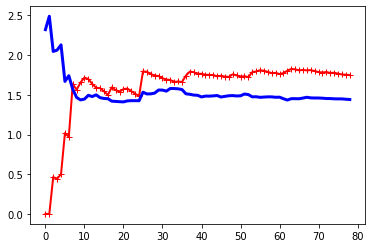

In [37]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

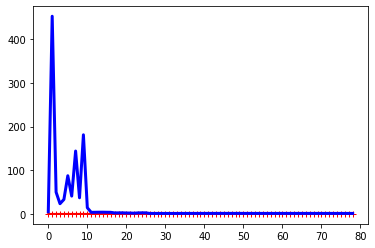

In [38]:
from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline([
                                ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
                                ("lin_reg",LinearRegression()),
                                ])
plot_learning_curves(polynomial_regression,X,y)

## 4.5 규제가 있는 선형 모델

-과대적합을 감소시키는 좋은 방법: 모델 규제

-다항 회귀 모델) 다항식의 차수 감소

-선형 회귀 모델) 모델의 가중치 제한 > 규제

## 4.5.1 릿지 회귀

-릿지 회귀: 규제가 추가된 선형 회귀 버전

-모델의 가중치가 가능한 작게 유지되도록 노력

-규제항(l2 노름의 제곱을 2로 나눈 것)은 훈련하는 동안에만 비용 함수에 추가

-모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가

In [39]:
#정규 방정식
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.013211]])

In [42]:
#확률적 경사하강법
sgd_reg=SGDRegressor(penalty="l2")
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5.01592475])

## 4.5.3 라쏘 회귀

-비용함수에 규제항(벡터의 l1 노름)

-덜 중요한 특성의 가중치를 제거하려고 함
 = 자동으로 특성 선택을 하고 희소모델

In [47]:
#lasso 대신 SGDRegressor(penalty="l1")도 가능
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.97227822])

## 4.5.3 엘라스틱넷

-릿지 회귀+라쏘 회귀

-규제항: 릿지와 회귀의 규제항을 단순히 더해 사용, 혼합 정도는 혼합 비율 r을 사용해 조절

-r=0이면 릿지 회귀, r=1이면 라쏘 회귀와 같음

**릿지가 기본이 되지만, 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷 추천
특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 라쏘보다는 엘라스틱넷 선호**

In [48]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.97290274])

## 4.5.4 조기 종료

-검증 에러가 최솟값에 도달하면 훈련 중지

-확률적 경사 하강법, 미니 배치 경사 하강법에서는 곡선이 그리 매끄럽지 않아 최솟값에 도달했는지 확인 어려울 수 있음. 이를 위해 검증 에러가 일정 시간동안 최솟값보다 클 때 학습 멈추고 검증 에러가 최소였을 때의 모델 파라미터로 되돌리는 방법 있음

In [51]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler=Pipeline([
           ("poly_features",PolynomialFeatures(degree=90,include_bias=False)),
           ("std_scaler",StandardScaler()),
           ])
X_train_poly_scaled=poly_scaler.fit_transform(X_train)
X_val_poly_scaled=poly_scaler.transform(X_val)

sgd_reg=SGDRegressor(max_iter=1,tol=-np.infty,warm_start=True,
                     penalty=None,learning_rate="constant",eta0=0.0005)
minimum_val_error=float("inf")
best_epoch=None
best_model=None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled,y_train)
  y_val_predict=sgd_reg.predict(X_val_poly_scaled)
  val_error=mean_squared_error(y_val,y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error=val_error
    best_epoch=epoch
    best_model=clone(sgd_reg)


NameError: ignored

## **4.6 로지스틱 회귀**

-샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용


## 4.6.1 확률 추정

-입력 특성의 가중치 합 계산

-결괏값의 로지스틱(시그모이드 함수) 출력



## 4.6.2 훈련과 비용 함수

-훈련의 목적: 양성 샘플에 대해서는 높은 확률 추정, 음성 샘플에 대해서는 낮은 확률 추정하는 모델의 파라미터 벡터 찾기

-음성 샘플의 확률을 0에 가깝세 추정하거나 양성 샘플의 확률을 1에 가깝게 추정하면 비용은 0에 가까워짐

## 4.6.3 결정 경계

In [54]:
!pip install sklearn

In [56]:
from sklearn import datasets

In [58]:
iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [59]:
X=iris["data"][:,3:]
y=(iris["target"]==2).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [60]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

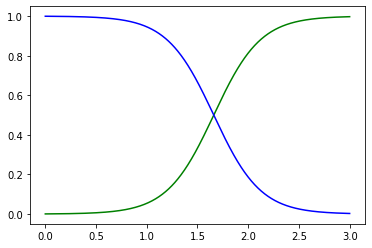

In [63]:
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],"g-",label="Iris virginica")
plt.plot(X_new,y_proba[:,0],"b-",label="Not Iris virginica")

In [64]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

## 4.6.4 소프트맥스 회귀

-로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고, 직접 다중 클래스를 지원하도록 일반화할 수 있음

-1번에 1개의 클래스만 예측

-모델이 타깃 클래스에 대해서는 높은 확률을 추정하도록 만드는 것이 목적

-크로스 엔트로피 비용 함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하는 것

In [65]:
X=iris["data"][:,(2,3)]
y=iris["target"]

softmax_reg=LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [66]:
softmax_reg.predict([[5,2]])

array([2])

In [68]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])